In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [6]:
#Loading in the Cleaned data set 
file_path = r"/Users/sa8/Desktop/MusicTrain/data/CleanedMusic.csv"

df = pd.read_csv(file_path)

In [7]:
df.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


---


# K Means Clustering Without Scaling

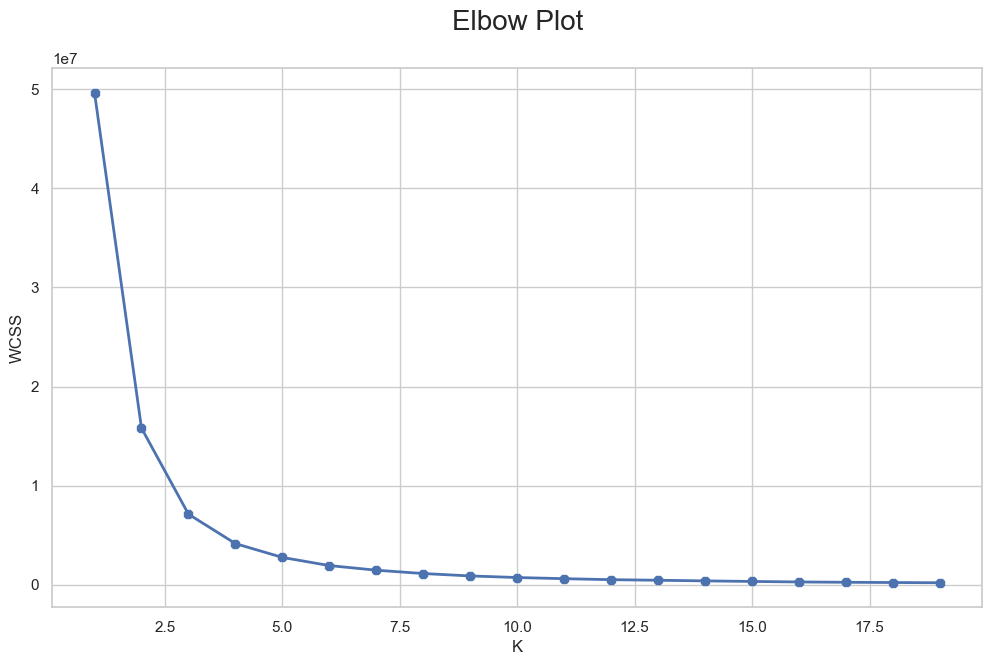

In [8]:
# Create an Elbow plot of WSS (Within-Cluster Sum of Squares)

X1 = df.loc[:, ['len','dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age']].values
wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters= k, init="k-means++" , random_state= 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize= (12,7))

sns.set(style="whitegrid")
plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

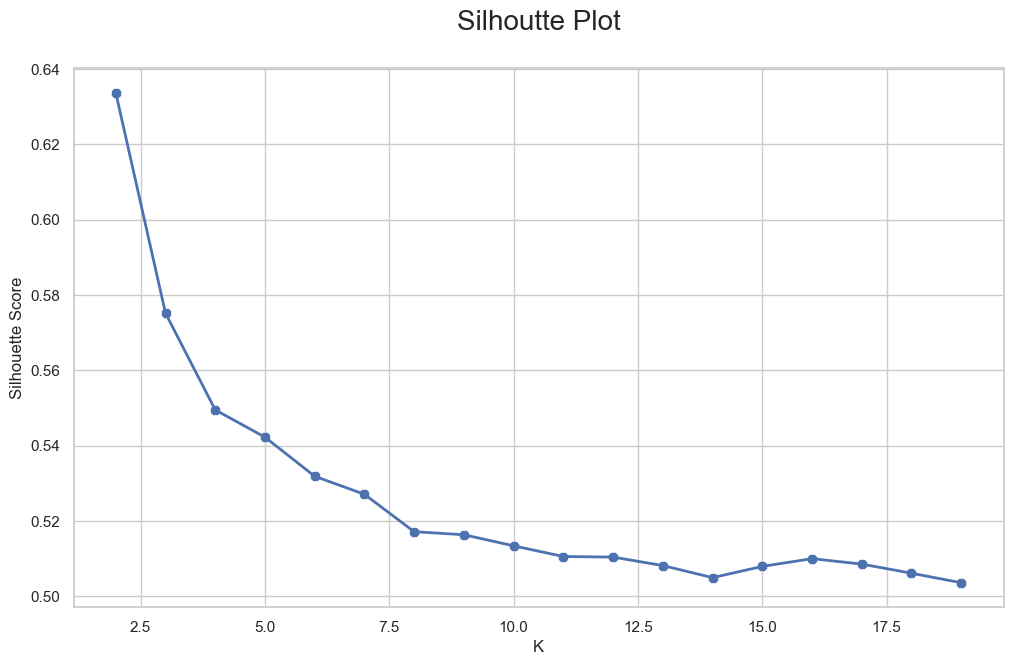

In [9]:
# Now lets create a plot of silhoutte score 


silhouette = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters = k, init = 'k-means++',random_state= 42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

# Looking at the Elbow and Silhouette plot , we will have K = 4 


In [10]:

# Initialize a KMeans model to identify 4 distinct clusters in the dataset.
# Using 'k-means++' for smarter centroid initialization to speed up convergence.
# n_init is set to 50 to run the algorithm multiple times with different centroid seeds
# and pick the best result based on inertia (within-cluster sum of squares).
# random_state ensures reproducibility of results.

kmeans =  KMeans(n_clusters= 4, init = "k-means++" ,n_init= 50,  random_state= 42)

# Fit the KMeans model to the dataset X1
kmeans.fit(X1)

# Initializes a KMeans model with 4 clusters using k-means++ initialization and a fixed random seed for reproducibility.
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=20, random_state=42)


In [11]:
# Generate labels for the dataset 

labels = kmeans.fit_predict(X1)
labels

array([0, 1, 1, ..., 3, 3, 3], dtype=int32)

In [12]:
#output the centroids of your clusters 

kmeans.cluster_centers_

array([[1.05784855e+02, 2.04270215e-02, 1.47056391e-01, 1.04572781e-01,
        5.56767163e-02, 2.15281611e-02, 1.81005471e-02, 3.10296776e-02,
        7.16415553e-02, 1.24452357e-01, 5.29636816e-02, 5.93765343e-02,
        4.63353649e-02, 2.53211300e-02, 1.04296113e-01, 3.11464827e-02,
        3.44542016e-01],
       [3.53326558e+01, 2.15363385e-02, 9.54333285e-02, 1.40876671e-01,
        6.13075408e-02, 1.36314603e-02, 1.63487401e-02, 7.16464788e-02,
        8.23656639e-02, 4.25134088e-02, 7.05007061e-02, 3.20482314e-02,
        5.19630790e-02, 2.39092427e-02, 1.58888631e-01, 3.29265759e-02,
        5.03005918e-01],
       [1.65540353e+02, 1.78918404e-02, 1.12138592e-01, 7.21925890e-02,
        3.68788963e-02, 2.50139369e-02, 1.63031157e-02, 1.73753154e-02,
        6.31760791e-02, 3.22147609e-01, 3.50270579e-02, 6.75758599e-02,
        3.48090305e-02, 2.29507973e-02, 4.41194345e-02, 2.46066513e-02,
        3.03374734e-01],
       [6.74374872e+01, 2.19893577e-02, 1.28642073e-01, 1.234

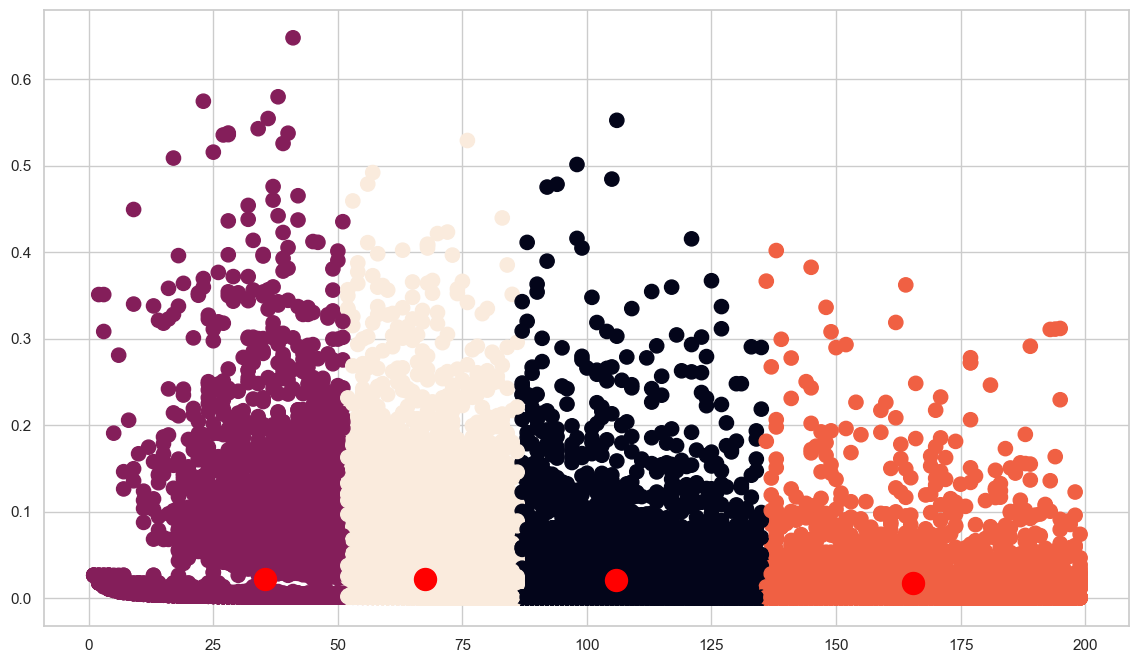

In [13]:
plt.figure(figsize = (14, 8))

plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

- This shows clear group separation, but it’s just a simplified snapshot using a few features — the actual clustering used all the data. With that in mind, let’s move on to K-Means with scaling.”

# K means clustering with Scaling 

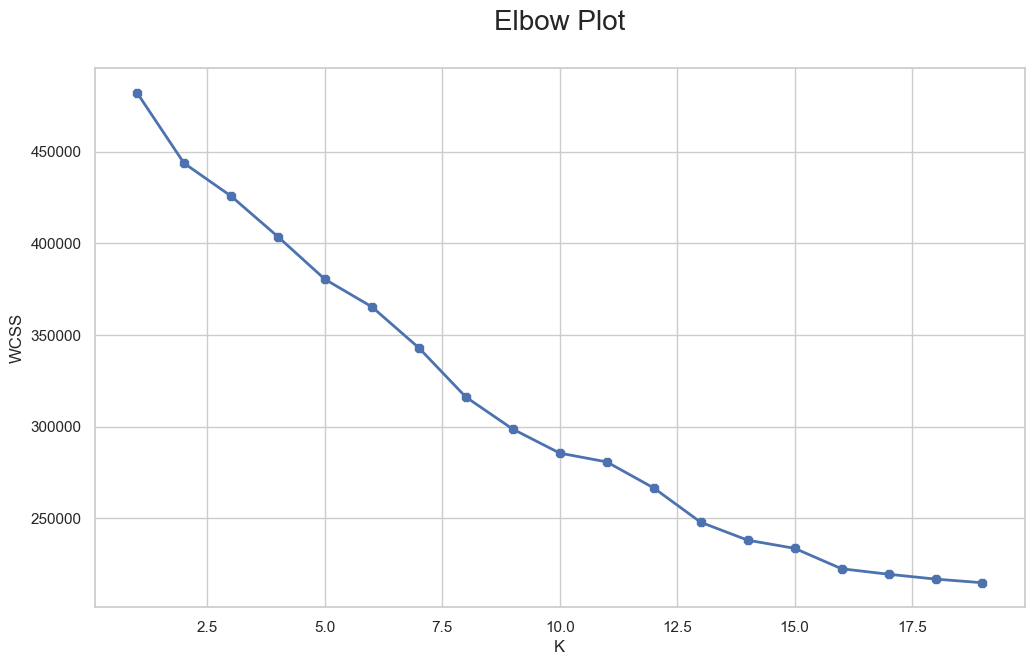

In [14]:
# Create a new KMeans object with 2 clusters. 
# Scaler used to make sure variables have equal range

scaler = StandardScaler()

#fit the Kmens Object
X1_scaled = scaler.fit_transform(X1)

wcss_scaled = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state= 42)
    kmeans.fit(X1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 20), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()




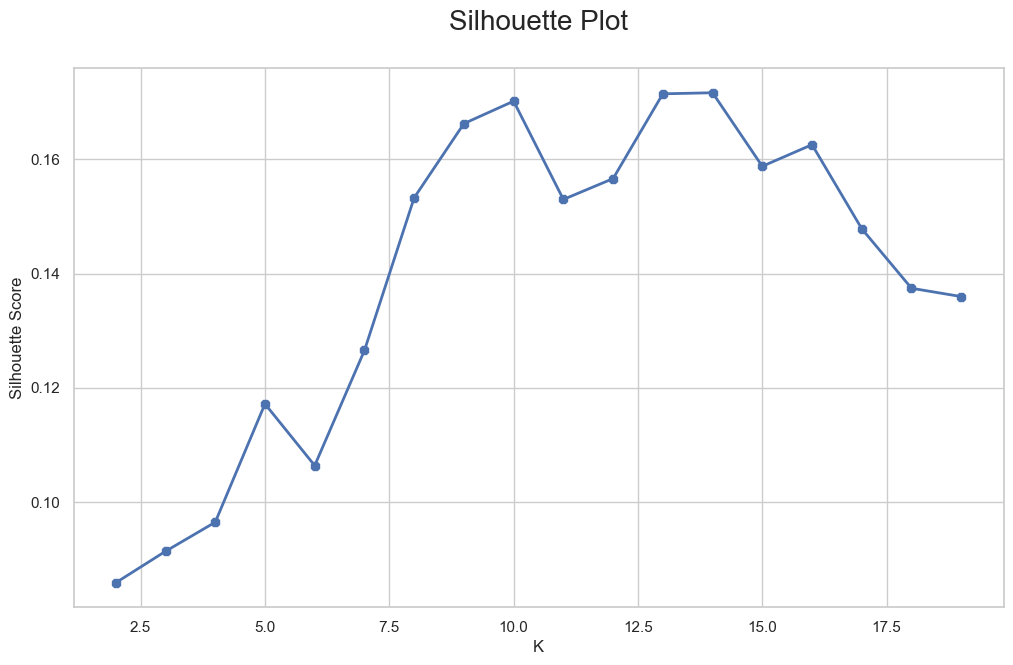

In [15]:
# create a plot of silhoutte score

sil_scaled = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state= 42)
    predictions = kmeans.fit_predict(X1_scaled)
    sil_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), sil_scaled, linewidth = 2, marker = '8')
plt.title('Silhouette Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()


# After doing the Elbow and Silhoutte plot for Kmeans with Scaling 
# Will with go with K = 13 

In [16]:
kmeans_scaled = KMeans(n_clusters=13, init="k-means++",n_init=50, random_state =42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=13, n_init=50, random_state=42)

In [17]:
#Labels for scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([ 7, 10,  0, ...,  5,  5,  5], dtype=int32)

In [18]:
#Get centroids
kmeans_scaled.cluster_centers_

array([[-2.10526501e-01, -1.31384983e-01, -4.57557211e-01,
        -4.08359796e-01, -2.16611166e-01, -1.72851208e-01,
        -4.45843631e-02, -1.94822022e-01, -7.06969576e-02,
        -3.86201309e-01,  2.92503566e+00,  1.39958394e-01,
        -1.17018665e-02, -5.88634808e-02, -3.78299469e-01,
        -1.39406142e-01,  3.97980128e-01],
       [-2.58946432e-01, -1.85932725e-01, -4.23809354e-01,
         1.85597919e+00, -2.13922844e-01, -1.86179527e-01,
        -1.60469081e-01, -1.59946470e-01,  1.28986254e-01,
        -4.04575858e-01, -2.52538044e-01,  2.01491983e-03,
        -1.61547252e-01, -1.20635564e-01, -3.36667371e-01,
        -9.58865599e-02,  6.23809870e-02],
       [ 1.76617680e-01, -3.53502349e-02, -1.71672201e-02,
        -1.01541408e-01, -1.15905514e-01,  4.18134942e+00,
        -1.13667865e-01, -1.70171108e-01, -2.45335569e-01,
         1.79004642e-01, -1.86464501e-01, -2.04748456e-01,
        -2.52457198e-01, -1.52445878e-01, -2.25769295e-01,
        -7.50533330e-02, -2.0

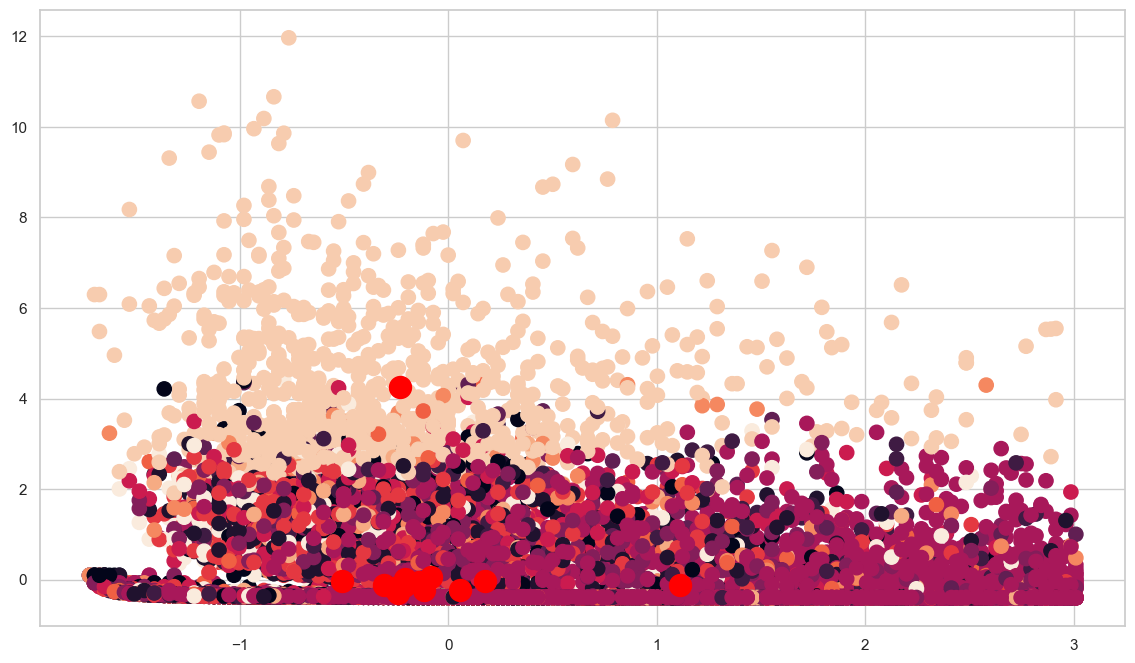

In [19]:
plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.xlabel('')
plt.ylabel('')
plt.show()

- After scaling the data, the clusters look more spread out and less clearly separated, which makes it harder to tell the groups apart just by looking at the chart. PCA will help with this ”

# Kmeans Clustering with Scaling Visualized with PCA

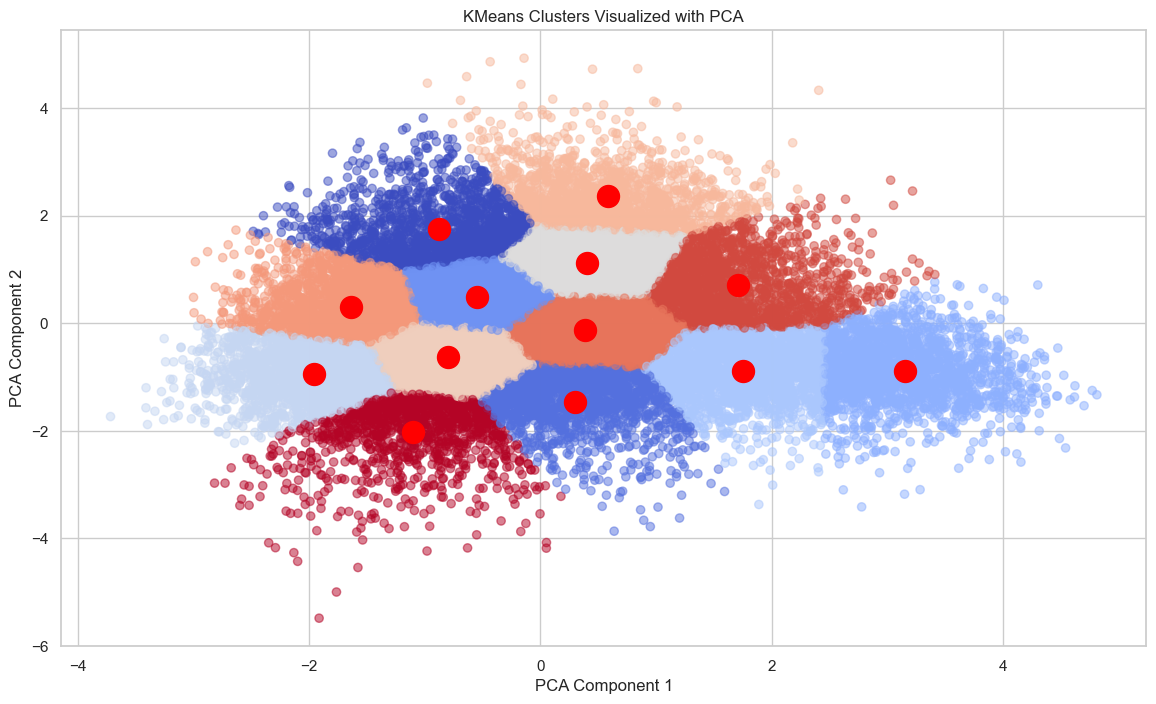

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1_scaled)


clusters = kmeans_scaled.fit_predict(X_pca)

plt.figure(figsize=(14, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters, cmap= "coolwarm", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


- Each dot represents a song, projected onto 2 principal components. These are the two new "summary" features created by PCA that capture the most variance with the 17 features we have within the data set. 
- Color coded regions show the different clusters discovered by KMeans. Each song has been assigned to one of the clusters based on similarity in PCA space. 
-  The red circles mark the centroids of each cluster - the center point of each group 
- Futhermore we can look into each cluster to see how there were grouped by (group by similar features, genere etc. )

In [21]:
#We are adding a Cluster column to are cleaned data set, using the scaled data KMeans with scaled data that was visualized with PCA

df['Cluster'] = kmeans_scaled.fit_predict(X1_scaled)

In [23]:
#Load Back in raw data set , apply so categorical columns to the clean data set 
df_raw = pd.read_csv("/Users/sa8/Desktop/MusicTrain/data/train.csv")

label1= df_raw[['genre', 'artist_name','track_name', 'release_date']]

label1 = pd.concat([label1, df], axis=1)

In [24]:
#We now have the categorical features added back just to help describe each song, we also have the cluster column added to this as well
label1

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,7
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,10
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,0
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,12
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,5
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,5
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,5
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,5


In [25]:
#Lets see how many songs are in each cluster
df['Cluster'].value_counts().sort_index().to_frame(name='Count')


,Count
Cluster,
0,2031
1,4084
2,859
3,802
4,4266
5,4111
6,1732
7,4607
8,1030


# Lets desrcibe each cluster 

In [26]:
# Lets make a dataframe of our cluster centers for better readability, this will help us describe each cluster better 

import pandas as pd

# Get the actual column names from your dataset
columns = ['len','dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age']

# Create the cluster centers DataFrame
cluster_centers_df = pd.DataFrame(kmeans_scaled.cluster_centers_, columns=columns)
cluster_centers_df.index = [f"Cluster {i}" for i in range(len(cluster_centers_df))]

# Display it
cluster_centers_df



,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
Cluster 0,-0.210527,-0.131385,-0.457557,-0.408360,-0.216611,-0.172851,-0.044584,-0.194822,-0.070697,-0.386201,2.925036,0.139958,-0.011702,-0.058863,-0.378299,-0.139406,0.397980
Cluster 1,-0.258946,-0.185933,-0.423809,1.855979,-0.213923,-0.186180,-0.160469,-0.159946,0.128986,-0.404576,-0.252538,0.002015,-0.161547,-0.120636,-0.336667,-0.095887,0.062381
Cluster 2,0.176618,-0.035350,-0.017167,-0.101541,-0.115906,4.181349,-0.113668,-0.170171,-0.245336,0.179005,-0.186465,-0.204748,-0.252457,-0.152446,-0.225769,-0.075053,-0.205987
Cluster 3,-0.141065,-0.054024,-0.079612,-0.079721,-0.075544,-0.079137,4.398427,-0.096346,-0.258847,-0.088383,-0.044645,-0.100924,-0.291374,-0.080235,-0.124558,-0.102552,0.280731
Cluster 4,0.058015,-0.225695,1.838018,-0.370660,-0.224057,-0.166935,-0.154628,-0.260908,0.051371,-0.379461,-0.300380,0.131569,-0.165470,-0.056996,-0.402838,-0.144626,-0.282177
Cluster 5,1.111549,-0.113509,-0.344118,-0.452734,-0.279724,0.020261,-0.107495,-0.331459,-0.056947,2.058520,-0.301552,0.296522,-0.283561,-0.196980,-0.573690,-0.190914,-0.487058
Cluster 6,-0.210347,0.012136,-0.427246,-0.410084,3.108165,-0.079824,-0.128358,-0.167749,0.055739,-0.352347,-0.237435,0.009001,-0.146647,-0.220811,-0.380236,-0.045066,0.070773
Cluster 7,-0.310618,-0.113478,-0.443165,-0.363021,-0.197559,-0.182482,-0.161515,-0.132020,0.255088,-0.415640,-0.250218,-0.093660,-0.224480,-0.193677,1.759136,-0.125836,0.055406
Cluster 8,-0.116545,-0.230279,0.290292,0.130987,-0.223944,-0.140286,-0.042755,-0.244081,-0.329009,-0.274717,-0.037344,-0.218464,-0.170899,3.833486,-0.200124,-0.159813,0.081184
Cluster 9,-0.083843,0.063029,-0.384260,-0.345928,-0.128063,0.007489,-0.035101,-0.181071,0.025258,-0.304381,-0.233816,-0.089982,-0.204251,-0.166111,-0.355175,4.753723,0.110779


# Lets go through each cluster and brieifly describe them , we will show examples of each below , 
##  each of the top 4 features in each cluster 
- Each feautre put in each cluster is descending highest to 4th. 

*Cluster 0*
- Music 
- age 
- movement/places 
- light/visual perceptions 

*Cluster 1*
- world/life
- communication
- age 
- movement/places

*Cluster 2 
- shake the audience
- obscene
- len
- violence

*Cluster 3 
- family/gospel
- age
- dating
- music

*Cluster 4*
- violence
- movement/places
- len
- Communication

*Cluster 5*
- obscene 
- len
- movement/places
- shake the audience

*Cluster 6*
- night/time 
- age 
- communication
- dating 

*Cluster 7*
- sadness
- communication
- age
- movement/places

*Cluster 8*
- family/ spiritual 
- violence 
- world/life
- age

*Cluster 9*
- feelings 
- age
- dating 
- communication

*Cluster 10*
- light/visual preceptions 
- age
- violence 
- sadness

*Cluster 11*
- dating 
- age
- romantic
- night/time 

*Cluster 12*
- romantic 
- age
- communication 
- light/visual perceptions 


In [27]:
#Using this code to look into a few of the clusters, just to see how they match up with the descriptions of the clusters 
"""*Cluster 0*
- Music 
- age 
- movement/places 
- light/visual perceptions """

label1[df['Cluster'] == 0].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
27767,hip hop,terror x crew,fear not (mi fovasai),2012,18,0.004785,0.004785,0.004785,0.004785,0.004785,...,0.004785,0.004785,0.747254,0.004785,0.004785,0.096243,0.004785,0.004785,0.114286,0
18905,jazz,ella fitzgerald,jersey bounce,1989,87,0.001316,0.001316,0.086724,0.096747,0.001316,...,0.001316,0.139647,0.475947,0.001316,0.001316,0.001316,0.001316,0.104217,0.442857,0
16703,blues,joe bonamassa,distant lonesome train,2016,52,0.026479,0.127169,0.001316,0.001316,0.026335,...,0.001316,0.001316,0.348078,0.001316,0.169470,0.001316,0.001316,0.001316,0.057143,0
13891,blues,ted nugent,death by misadventure,1977,52,0.001645,0.439361,0.104416,0.001645,0.001645,...,0.001645,0.001645,0.429908,0.001645,0.001645,0.001645,0.001645,0.001645,0.614286,0
12524,blues,ella fitzgerald,pete kelly's blues,1955,43,0.001462,0.001462,0.333061,0.001462,0.001462,...,0.001462,0.218136,0.366647,0.001462,0.001462,0.060227,0.001462,0.001462,0.928571,0
18850,jazz,the andrews sisters,beer barrel polka ( roll out the barrel ),1987,90,0.001012,0.001012,0.001012,0.101255,0.001012,...,0.001012,0.001012,0.367202,0.192783,0.085661,0.001012,0.001012,0.055915,0.471429,0
23526,rock,ritchie valens,fast freight,1959,31,0.004386,0.004386,0.004386,0.004386,0.004386,...,0.004386,0.004386,0.419186,0.004386,0.171694,0.004386,0.004386,0.004386,0.871429,0
10432,country,george strait,last in love,1992,34,0.001645,0.001645,0.001645,0.052673,0.001645,...,0.001645,0.001645,0.431691,0.001645,0.001645,0.001645,0.367893,0.001645,0.400000,0
20610,jazz,the main ingredient,summer breeze,2015,91,0.000693,0.000693,0.000693,0.154135,0.000693,...,0.000693,0.000693,0.360580,0.029740,0.090575,0.000693,0.000693,0.065610,0.071429,0
15350,blues,joe cocker,while you see a chance,1999,25,0.002506,0.002506,0.221865,0.002506,0.002506,...,0.002506,0.002506,0.310510,0.002506,0.002506,0.051072,0.378960,0.002506,0.300000,0


In [28]:
""" *Cluster 1*
- world/life
- communication
- age 
- movement/places
"""

label1[df['Cluster'] == 1].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
2924,pop,wipers,doom town,1983,54,0.001815,0.001815,0.930577,0.001815,0.001815,...,0.001815,0.001815,0.001815,0.038570,0.001815,0.001815,0.001815,0.001815,0.528571,1
10094,country,randy travis,when your world was turning for me,1989,35,0.001815,0.001815,0.524192,0.001815,0.001815,...,0.184077,0.001815,0.001815,0.001815,0.193983,0.070525,0.001815,0.001815,0.442857,1
17531,jazz,anita o'day,i could write a book,1960,73,0.000907,0.090144,0.425522,0.000907,0.000907,...,0.234782,0.000907,0.143566,0.000907,0.000907,0.000907,0.047117,0.000907,0.857143,1
6,pop,freestyle,opm medley: when i met you,1950,179,0.000483,0.000483,0.371817,0.040712,0.000483,...,0.384703,0.000483,0.000483,0.000483,0.044355,0.000483,0.000483,0.123150,1.000000,1
14490,blues,the mad lads,gone! the promises of yesterday,1984,95,0.093348,0.000591,0.547200,0.000591,0.056801,...,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.190832,0.038510,0.514286,1
9950,country,dolly parton,making plans,1987,54,0.001032,0.001032,0.405415,0.026997,0.001032,...,0.001032,0.001032,0.097738,0.001032,0.001032,0.001032,0.183141,0.036097,0.471429,1
12217,country,miranda lambert,to learn her,2016,41,0.001422,0.001422,0.427638,0.001422,0.001422,...,0.229491,0.001422,0.001422,0.192777,0.051523,0.001422,0.001422,0.001422,0.057143,1
6572,pop,george ezra,budapest,2015,77,0.091153,0.000877,0.307498,0.000877,0.000877,...,0.000877,0.000877,0.000877,0.056690,0.000877,0.018733,0.262910,0.099216,0.071429,1
34,pop,ghantasala,thunintha pin,1953,87,0.000877,0.000877,0.421309,0.057732,0.000877,...,0.181324,0.000877,0.034583,0.000877,0.024780,0.137959,0.000877,0.000877,0.957143,1
5567,pop,sum 41,walking disaster,2007,145,0.000458,0.089025,0.390946,0.058770,0.000458,...,0.176524,0.000458,0.065072,0.033975,0.000458,0.016352,0.064400,0.080287,0.185714,1


In [29]:
""" *Cluster 11*
- dating 
- age
- romantic
- night/time
""" 
label1[df['Cluster'] == 11].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
19467,jazz,steve oliver,midnight at the oasis,1999,75,0.145930,0.000774,0.098428,0.000774,0.000774,...,0.000774,0.000774,0.000774,0.000774,0.096813,0.000774,0.379258,0.000774,0.300000,11
15325,blues,susan tedeschi,rock me right,1998,97,0.199127,0.046388,0.000666,0.353217,0.037901,...,0.000666,0.000666,0.000666,0.057160,0.000666,0.000666,0.000666,0.011524,0.314286,11
16612,blues,welshly arms,hold on i'm coming,2014,68,0.409066,0.000822,0.000822,0.034031,0.065055,...,0.000822,0.000822,0.000822,0.000822,0.000822,0.036860,0.000822,0.000822,0.085714,11
13539,blues,aretha franklin,didn't i (blow your mind this time),1972,104,0.182946,0.000511,0.000511,0.382297,0.000511,...,0.083468,0.000511,0.175789,0.000511,0.000511,0.000511,0.086177,0.000511,0.685714,11
12958,blues,john lee hooker,blues before sunrise,1962,59,0.181118,0.001012,0.001012,0.001012,0.001012,...,0.121185,0.001012,0.066217,0.001012,0.001012,0.001012,0.332550,0.001012,0.828571,11
3513,pop,guy,groove me,1988,74,0.182006,0.000957,0.000957,0.306192,0.032335,...,0.000957,0.000957,0.050219,0.000957,0.000957,0.000957,0.000957,0.019200,0.457143,11
18859,jazz,louis armstrong,stardust,1988,42,0.202565,0.001880,0.001880,0.072604,0.001880,...,0.001880,0.001880,0.104504,0.001880,0.129117,0.001880,0.313483,0.001880,0.457143,11
2357,pop,chaka khan,i was made to love him,1978,69,0.207576,0.001032,0.323541,0.001032,0.031183,...,0.054482,0.001032,0.001032,0.103598,0.043941,0.033226,0.001032,0.001032,0.600000,11
3502,pop,beat happening,indian summer,1988,102,0.258736,0.071725,0.102310,0.000907,0.000907,...,0.000907,0.000907,0.344896,0.129706,0.000907,0.000907,0.000907,0.000907,0.457143,11
19910,jazz,lizz wright,hit the ground,2005,35,0.349378,0.501949,0.001504,0.001504,0.001504,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.059125,0.001504,0.214286,11


---

# New Sample Prediction 

# KMeans Clustering with Scaling and PCA

In [30]:
# Load new sample test data 

file_path = r"/Users/sa8/Desktop/MusicTrain/data/recommend.csv"
df_test = pd.read_csv(file_path)



df_test.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429


In [31]:
#Lets remove the columns we will not use , just like with the previous test data 
df_test_clean= df_test.drop(['Unnamed: 0','artist_name','lyrics', 'track_name', 'genre', 'topic', 'like/girls', 'release_date'], axis=1)

In [32]:
# Copy test dataset to a new variable for transformation
G1 = df_test_clean.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age', 'len']].values  # G1 is used for scaled processing to preserve the original df_test

# Scaling the test data
scaler = StandardScaler()
G1_scaled = scaler.fit_transform(G1)




# Fit the KMeans model on the scaled data and assign cluster labels to the original dataframe
df_test_clean['Cluster'] = kmeans_scaled.predict(G1_scaled)


In [33]:
df_test_clean

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,6
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,1
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,7
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,0
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,3
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,10
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,1
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,12
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,1
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,4


In [34]:
# Extract original label columns that were previously dropped
label2 = df_test[['genre', 'artist_name', 'track_name','release_date']]

# Concatenate the labels with the test data (including cluster assignments) for descriptive analysis
label2 = pd.concat([label2, df_test_clean], axis=1)


In [35]:
#Lets see how many songs are in each cluster
df_test_clean['Cluster'].value_counts().sort_index().to_frame(name='Songs')


,Songs
Cluster,
0,1
1,3
3,1
4,1
6,1
7,1
10,1
12,1


## The only cluster with 3 songs together in this test data...

In [36]:
# To note cluster 1 represents :  
#  world/life
# - communication
# - age 
# - movement/places


label2[df_test_clean['Cluster']==1]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
1,reggae,dennis brown,second chance,1993,43,0.001224,0.029943,0.001224,0.306688,0.001224,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,1
6,rock,rage against the machine,pistol grip pump,2000,152,0.000675,0.000675,0.134044,0.293819,0.000675,...,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,1
8,country,randy travis,messin' with my mind,1986,41,0.001504,0.001504,0.132148,0.492312,0.001504,...,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,1


In [37]:

"""
*Cluster 4*
- violence
- movement/places
- len
- Communication
"""
 
label2[df_test_clean['Cluster']==4]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
9,pop,paramore,playing god,2009,91,0.000711,0.543658,0.114697,0.098286,0.01472,...,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,4
